# Proyecto 1 - Analisis de datos para la deteccion de noticias falsas
Integrantes


*   Anderson Arevalo Mendoza, 202014997
*   Juan José Hurtado Cantin, 202224472
*   Nicolas Perez Ramos, 202221292

Librerias

In [ ]:
import pandas as pd
# Manejo de gráficas
!pip install scikit-plot
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Instalación de librerias

import numpy as np

!pip install pandas-profiling
!pip install contractions
!pip install ydata-profiling
!pip install num2words

from num2words import num2words
from ydata_profiling import ProfileReport
import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


1. CANVA - Documentación del proceso de aprendizaje automático


#2. Perfilamiento y Entendimiento de los datos

In [ ]:
FilePath='/content/fake_news_spanish.csv'
data=pd.read_csv(FilePath, sep=';')
data
print(data.head())
data_t=data


   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  
0  El diario británico publicó este pasado jueves...  02/06/2023  
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023  
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022  
3  En política, igual que hay que negociar con lo...  03/01/2022  
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018  


In [ ]:
data_t

ID  Label                                             Titulo  \
0      ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1      ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2      ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3      ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4      ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   
...    ..    ...                                                ...   
57058  ID      1  El Defensor del Pueblo reclama a la Comunidad ...   
57059  ID      0  El EQUO plantea ceder la presidencia de la Com...   
57060  ID      1  Alberto Garzón: 'Que los Borbones son unos lad...   
57061  ID      1  Vox exige entrar en el Gobierno de Castilla y ...   
57062  ID      1  Unas 300 personas protestan contra la visita d...   

                                             Descripcion       Fecha  
0      El diario británico publicó este pasado jueves...  02/06/2023  
1      REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023  
2      El valencianismo convoca en Castelló su fiesta...  25/04/2022  
3      En política, igual que hay que negociar con lo...  03/01/2022  
4      En una entrevista en El Punt Avui, el líder de...  09/03/2018  
...                                                  ...         ...  
57058  El gobierno regional han indicado que la atenc...  08/06/2021  
57059  Si la higiene democrática nos lleva a esa exig...  08/09/2020  
57060  El coordinador federal de IU asegura que la mo...  12/07/2018  
57061  Santiago Abascal: Vox tiene el derecho y el de...  13/02/2022  
57062  Los Mossos dEsquadra han blindado los alrededo...  09/10/2020  

[57063 rows x 5 columns]

In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


## 2.1 Entendimiento de los datos

Se aplica estadistica descriptiva para realizar un analisis de los datos

In [ ]:
def moda(words):
  if type(words) == float:
    return None
  words = words.split(' ')
  conteo ={}
  for word in words:
    if len(word)>3:
      if word in conteo:
        conteo[word] += 1
      else:
        conteo[word] = 1
  for key, value in conteo.items():
    if value == max(conteo.values()):
      moda = key
  return moda
def moda1(words):
  if type(words) == float:
    return None
  words = words.split(' ')
  conteo ={}
  for word in words:
    if len(word)>0:
      if word in conteo:
        conteo[word] += 1
      else:
        conteo[word] = 1
  for key, value in conteo.items():
    if value == max(conteo.values()):
      moda = key
  return moda
columna=['Titulo','Descripcion']
textos = data_t.copy()
for col in columna:
  textos['Conteo' + col] = [len(str(x)) for x in textos[col]]
  textos['Moda' +col ] = data_t[col].apply(moda)
  textos['Moda' +col+'Articulos' ] = data_t[col].apply(moda1)
  textos['Max'+ col] = [[max([len(str(x)) for x in str(i).split(' ')])][0] for i in textos[col]]
  textos['Min' + col] = [[min([len(str(x)) for x in str(i).split(' ')])][0] for i in textos[col]]


In [ ]:
textos

ID  Label                                             Titulo  \
0      ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1      ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2      ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3      ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4      ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   
...    ..    ...                                                ...   
57058  ID      1  El Defensor del Pueblo reclama a la Comunidad ...   
57059  ID      0  El EQUO plantea ceder la presidencia de la Com...   
57060  ID      1  Alberto Garzón: 'Que los Borbones son unos lad...   
57061  ID      1  Vox exige entrar en el Gobierno de Castilla y ...   
57062  ID      1  Unas 300 personas protestan contra la visita d...   

                                             Descripcion       Fecha  \
0      El diario británico publicó este pasado jueves...  02/06/2023   
1      REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2      El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3      En política, igual que hay que negociar con lo...  03/01/2022   
4      En una entrevista en El Punt Avui, el líder de...  09/03/2018   
...                                                  ...         ...   
57058  El gobierno regional han indicado que la atenc...  08/06/2021   
57059  Si la higiene democrática nos lleva a esa exig...  08/09/2020   
57060  El coordinador federal de IU asegura que la mo...  12/07/2018   
57061  Santiago Abascal: Vox tiene el derecho y el de...  13/02/2022   
57062  Los Mossos dEsquadra han blindado los alrededo...  09/10/2020   

       ConteoTitulo        ModaTitulo ModaTituloArticulos  MaxTitulo  \
0                77           frutos'             frutos'          9   
1               104            DUARTE                   A         10   
2                77              años                años         10   
3               110      fundamental'                   a         12   
4                72       elecciones'         elecciones'         11   
...             ...               ...                 ...        ...   
57058           116          Primaria                  de          9   
57059           100            Prieto                  de         11   
57060            90       constatado'         constatado'         14   
57061           118  García-Gallardo'                  de         16   
57062            64         Barcelona           Barcelona          9   

       MinTitulo  ConteoDescripcion ModaDescripcion ModaDescripcionArticulos  \
0              2                218   ultraderecha.                       de   
1              1               3251            para                      que   
2              1                169       estatuto.                       de   
3              1                133        negociar                      que   
4              2                242     elecciones.                        a   
...          ...                ...             ...                      ...   
57058          1                244        atención                       la   
57059          1                314     madrileños.                        y   
57060          2                 70     putrefacta.              putrefacta.   
57061          1                232    corresponda.                      que   
57062          1                193       policial.                      del   

       MaxDescripcion  MinDescripcion  
0                  13               1  
1                  17               1  
2                  13               2  
3                  15               2  
4                  14               1  
...               ...             ...  
57058              12               1  
57059              11               1  
57060              11               2  
57061              12               1  
57062              11  

In [ ]:
print(textos.ConteoTitulo.value_counts(normalize=True).head(20))
print(textos[textos['ConteoTitulo']>200])

ConteoTitulo
82     0.019067
88     0.018664
84     0.018471
83     0.018261
85     0.017928
90     0.017752
86     0.017577
77     0.017419
81     0.017069
87     0.016946
115    0.016929
89     0.016894
106    0.016771
80     0.016280
110    0.016158
104    0.016035
109    0.016017
114    0.015947
113    0.015930
107    0.015895
Name: proportion, dtype: float64
       ID  Label                                             Titulo  \
1495   ID      0  Cristina Narbona provoca una tormenta política...   
12532  ID      1  Schwarzenegger, contra la exhumación de Franco...   
17958  ID      1  Desde ayer, fumar conduciendo es una infracció...   
24412  ID      1  El encargado del transporte digitalizado de vo...   
42498  ID      1  Sánchez provoca una tormenta política y judici...   

                                             Descripcion       Fecha  \
1495   Te proponemos cinco noticias para que empieces...  06/11/2019   
12532  Existen condimentos artificiales para cocinar ...  02/07

In [ ]:
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cols=data_t.columns
for col in cols:
  num_duplicated = data_t.duplicated(subset = col).sum()
  print(f"{col}: {num_duplicated}")
  if num_duplicated > 0 and col =='objid':
    print(data_t[data_t.duplicated(subset = 'objid', keep = False)].sort_values('objid'))

ID: 57062
Label: 57061
Titulo: 5458
Descripcion: 7425
Fecha: 54792


Eliminar datos duplicados titulo y descripcion

In [ ]:

data_t.drop_duplicates(subset = 'Titulo', keep = 'first', inplace = True)
print(data_t[data_t.duplicated(subset = 'Titulo', keep = False)].sort_values('Titulo'))
data_t.drop_duplicates(subset = 'Descripcion', keep = 'first', inplace = True)
print(data_t[data_t.duplicated(subset = 'Descripcion', keep = False)].sort_values('Descripcion'))

Empty DataFrame
Columns: [ID, Label, Titulo, Descripcion, Fecha]
Index: []
Empty DataFrame
Columns: [ID, Label, Titulo, Descripcion, Fecha]
Index: []


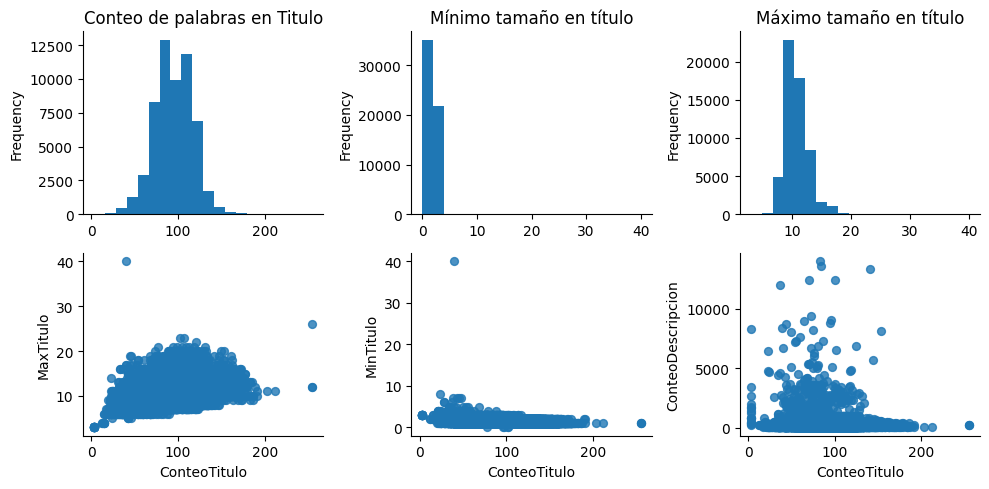

In [ ]:
#histogramas de frecuencia
plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
textos['ConteoTitulo'].plot(kind='hist', bins=20, title='Conteo de palabras en Titulo')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 2)
textos['MinTitulo'].plot(kind='hist', bins=20, title='Mínimo tamaño en título')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 3)
textos['MaxTitulo'].plot(kind='hist', bins=20, title='Máximo tamaño en título')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 4)
plt.scatter(textos['ConteoTitulo'], textos['MaxTitulo'], s=32, alpha=0.8)
plt.xlabel('ConteoTitulo')
plt.ylabel('MaxTitulo')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplot(2, 3, 5)
plt.scatter(textos['ConteoTitulo'], textos['MinTitulo'], s=32, alpha=0.8)
plt.xlabel('ConteoTitulo')
plt.ylabel('MinTitulo')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 6)
plt.scatter(textos['ConteoTitulo'], textos['ConteoDescripcion'], s=32, alpha=0.8)
plt.xlabel('ConteoTitulo')
plt.ylabel('ConteoDescripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()





In [ ]:
print(textos.ModaTitulo.value_counts(normalize=True).head(20))
print(textos.ModaTituloArticulos.value_counts(normalize=True).head(20))

ModaTitulo
Madrid          0.016092
Catalunya       0.011657
Gobierno        0.010781
Congreso        0.008852
Andalucía       0.007713
España          0.005259
para            0.005189
Sánchez         0.004593
electoral       0.004523
Podemos         0.004347
años            0.004330
Presupuestos    0.004207
elecciones      0.004119
EQUO            0.004014
'procés'        0.003944
PSOE            0.003944
EAJ-PNV         0.003786
León            0.003734
euros           0.003681
Barcelona       0.003594
Name: proportion, dtype: float64
ModaTituloArticulos
de           0.240223
la           0.089943
a            0.052466
el           0.049450
en           0.032307
y            0.021176
del          0.020071
que          0.019510
los          0.013778
las          0.007520
con          0.005907
al           0.005329
Madrid       0.005329
un           0.005048
Catalunya    0.004908
por          0.004715
PP           0.004032
Gobierno     0.003786
Congreso     0.003523
Andalucía    0.003

Para el entendimiento de los datos especialmente, en el conteo de la moda se aplica un filtrado para solo calcular la moda con las palabras que tienen mas de 3 letras. Esto permite descartar los articulos y obtener mas informacion de las palabras que mas se repiten. En el titulo las palabras Madrid Catalunya Gobierno son las palabras que mas se repiten. De igual forma a partir de las graficas observacas se observa que los titulos usualmente estan compuestos de entre 80 y 120 palabras. Que la palabra de minimo tamaño mas repetida es de 2 letras y la maxima cantidad de letras en una palabra tiene 10 a 12 letras. Tambien podemos observar que gran parte de los titulos estan compuestos por palabras de alrededor de las 10 a 20 letras. Los articulos que mas se repiten para el titulo son de, la, a, el.

## entendimiento para Descripcion

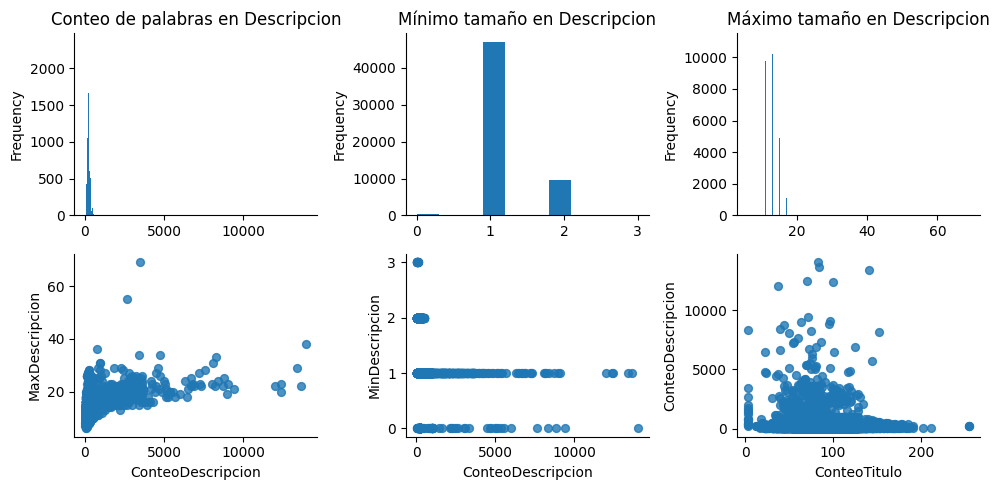

In [ ]:

#histogramas de frecuencia
plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
textos['ConteoDescripcion'].plot(kind='hist', bins=3000, title='Conteo de palabras en Descripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 2)
textos['MinDescripcion'].plot(kind='hist',  title='Mínimo tamaño en Descripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 3)
textos['MaxDescripcion'].plot(kind='hist', bins=3000, title='Máximo tamaño en Descripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 4)
plt.scatter(textos['ConteoDescripcion'], textos['MaxDescripcion'], s=32, alpha=0.8)
plt.xlabel('ConteoDescripcion')
plt.ylabel('MaxDescripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplot(2, 3, 5)
plt.scatter(textos['ConteoDescripcion'], textos['MinDescripcion'], s=32, alpha=0.8)
plt.xlabel('ConteoDescripcion')
plt.ylabel('MinDescripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(2, 3, 6)
plt.scatter(textos['ConteoTitulo'], textos['ConteoDescripcion'], s=32, alpha=0.8)
plt.xlabel('ConteoTitulo')
plt.ylabel('ConteoDescripcion')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
print(textos.ModaDescripcion.value_counts(normalize=True).head(20))
print(textos.ModaDescripcionArticulos.value_counts(normalize=True).head(20))

ModaDescripcion
para          0.038046
como          0.008797
Madrid.       0.005993
sobre         0.005801
Gobierno.     0.005625
Catalunya     0.005065
Catalunya.    0.004854
partido.      0.004784
Gobierno      0.004679
contra        0.004679
este          0.004048
Congreso.     0.003750
España.       0.003593
partido       0.003400
años.         0.003295
euros.        0.003189
vers          0.003172
EQUO          0.003137
presidente    0.003102
Madrid        0.003014
Name: proportion, dtype: float64
ModaDescripcionArticulos
de      0.437376
la      0.141948
que     0.074619
el      0.063579
en      0.044687
a       0.036206
y       0.034330
del     0.027881
los     0.014738
las     0.009586
por     0.005958
un      0.005205
ha      0.005205
con     0.005152
para    0.004574
su      0.004346
se      0.004066
no      0.003890
al      0.003750
una     0.003487
Name: proportion, dtype: float64


In [ ]:
print(textos.ConteoDescripcion.value_counts(normalize=True).head(20))

ConteoDescripcion
255    0.009358
235    0.008867
233    0.008867
237    0.008394
239    0.008377
236    0.008237
234    0.008061
229    0.008026
238    0.007904
231    0.007851
232    0.007623
240    0.007606
228    0.007430
230    0.007360
226    0.007343
225    0.007325
227    0.007027
222    0.006940
242    0.006940
224    0.006870
Name: proportion, dtype: float64


En el entendimiento de datos de la descripcion podemos identificar que la gran mayoria de descripciones tienen alrededor de 250 palabras. De igual forma la minima cantidad de letras en una palabra es de 1 y la maxima palabra se encuentra alrededor de las 16 letras. Por otro lado se observa que las descripciones con palabras con una cantidad maxima de 20 letras presentan una extension de alrededor de las 5000 palabras. De igual forma se observa que los titulos con alrededor de 100 palabras tienen una descripcion de 5000 palabras. Las palabras mas utilizadas son para, como, madrid,sobre y gobierno. Por otro lado los articulos mas utilizados en la descripcion son de, la que, el y en.

## 3. Preparacion de los datos


###3.1Limpieza de los datos

En esta seccion realizaremos la limpieza de los datos la cual esta compuesta por las siguientes secciones:

1.   Pasar las palabras a minuscula
2.   remplazar los numeros a letras
3.   Remover la puntuacion
4. remover los caracteres que no son ASCII
5. remover las stopwords



In [ ]:
print(stopwords.words('spanish'))

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = word.lower()
            new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

### 3.2 Tokenizar

Mediante tokenizar vamos a dividir oraciones y frases en palabras tanto para titulo como para la descripcion. La division se almacenara en PalabrasTit para los titulos y palabrasDes para las descripciones. De igual forma se eliminaran todas las filas que en palabras sean nulos o vacios aplicando dropna. Luego se imprimira la informacion de las palabras y se determino que 57063 registros no vacios en la base de datos.

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Titulo

data_t['palabrasTit'] = data_t['Titulo'].astype(str).apply(word_tokenize)
data_t['palabrasTit'].dropna()
#Descripcion

data_t['palabrasDes'] = data_t['Descripcion'].astype(str).apply(word_tokenize)
data_t['palabrasDes'].dropna()
data_t.head()



ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                         palabrasTit  \
0  ['The, Guardian, ', va, con, Sánchez, :, 'Euro...   
1  [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...   
2  [El, 'Ahora, o, nunca, ', de, Joan, Fuster, so...   
3  [Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ...   
4  [Puigdemont, :, 'No, sería, ninguna, tragedia,...   

                                         palabrasDes  
0  [El, diario, británico, publicó, este, pasado,...  
1  [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...  
2  [El, valencianismo, convoca, en, Castelló, su,...  
3  [En, política, ,, igual, que, hay, que, negoci...  
4  [En, una, entrevista, en, El, Punt, Avui, ,, e...

In [ ]:
data_t.shape

(44640, 7)

In [ ]:
data_t['palabrasTit'].info()

<class 'pandas.core.series.Series'>
Index: 44640 entries, 0 to 57061
Series name: palabrasTit
Non-Null Count  Dtype 
--------------  ----- 
44640 non-null  object
dtypes: object(1)
memory usage: 697.5+ KB


In [ ]:
data_t['palabrasDes'].info()

<class 'pandas.core.series.Series'>
Index: 44640 entries, 0 to 57061
Series name: palabrasDes
Non-Null Count  Dtype 
--------------  ----- 
44640 non-null  object
dtypes: object(1)
memory usage: 697.5+ KB


Luego de la fase anterior, vamos a aplicar el preprocesamiento que definimos anteriormente aplicando las 5 fases para titulos y descripcion

In [ ]:
data_t['palabrasTit']=data_t['palabrasTit'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                         palabrasTit  \
0  [the, guardian, va, sanchez, europa, necesita,...   
1  [revelan, gobierno, negocio, liberacion, mirel...   
2  [ahora, nunca, joan, fuster, estatuto, valenci...   
3  [iglesias, alienta, yolanda, diaz, erc, eh, bi...   
4  [puigdemont, seria, ninguna, tragedia, repetic...   

                                         palabrasDes  
0  [El, diario, británico, publicó, este, pasado,...  
1  [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...  
2  [El, valencianismo, convoca, en, Castelló, su,...  
3  [En, política, ,, igual, que, hay, que, negoci...  
4  [En, una, entrevista, en, El, Punt, Avui, ,, e...

In [ ]:
data_t['palabrasDes']=data_t['palabrasDes'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                         palabrasTit  \
0  [the, guardian, va, sanchez, europa, necesita,...   
1  [revelan, gobierno, negocio, liberacion, mirel...   
2  [ahora, nunca, joan, fuster, estatuto, valenci...   
3  [iglesias, alienta, yolanda, diaz, erc, eh, bi...   
4  [puigdemont, seria, ninguna, tragedia, repetic...   

                                         palabrasDes  
0  [diario, britanico, publico, pasado, jueves, e...  
1  [revelan, gobierno, negocio, liberacion, mirel...  
2  [valencianismo, convoca, castello, fiesta, gra...  
3  [politica, igual, negociar, empresarios, negoc...  
4  [entrevista, punt, avui, lider, jxcat, desdram...

In [ ]:
data_t.shape

(44640, 7)

### 3.4 seleccion de campos

In [ ]:
data_t['palabrasTit'] = data_t['palabrasTit'].apply(lambda x: ' '.join(map(str, x)))
data_t
data_t['palabrasDes'] = data_t['palabrasDes'].apply(lambda x: ' '.join(map(str, x)))
data_t

ID  Label                                             Titulo  \
0      ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1      ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2      ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3      ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4      ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   
...    ..    ...                                                ...   
57057  ID      0  Polémica por la construcción de un nuevo aerop...   
57058  ID      1  El Defensor del Pueblo reclama a la Comunidad ...   
57059  ID      0  El EQUO plantea ceder la presidencia de la Com...   
57060  ID      1  Alberto Garzón: 'Que los Borbones son unos lad...   
57061  ID      1  Vox exige entrar en el Gobierno de Castilla y ...   

                                             Descripcion       Fecha  \
0      El diario británico publicó este pasado jueves...  02/06/2023   
1      REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2      El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3      En política, igual que hay que negociar con lo...  03/01/2022   
4      En una entrevista en El Punt Avui, el líder de...  09/03/2018   
...                                                  ...         ...   
57057  El proyecto de un nuevo aeropuerto genera cont...  23/12/2021   
57058  El gobierno regional han indicado que la atenc...  08/06/2021   
57059  Si la higiene democrática nos lleva a esa exig...  08/09/2020   
57060  El coordinador federal de IU asegura que la mo...  12/07/2018   
57061  Santiago Abascal: Vox tiene el derecho y el de...  13/02/2022   

                                             palabrasTit  \
0      the guardian va sanchez europa necesita apuest...   
1      revelan gobierno negocio liberacion mireles ca...   
2      ahora nunca joan fuster estatuto valenciano cu...   
3      iglesias alienta yolanda diaz erc eh bildu neg...   
4      puigdemont seria ninguna tragedia repeticion e...   
...                                                  ...   
57057  polemica construccion nuevo aeropuerto zona pr...   
57058  defensor pueblo reclama comunidad madrid datos...   
57059  equo plantea ceder presidencia comunidad madri...   
57060  alberto garzon borbones ladrones hecho histori...   
57061  vox exige entrar gobierno castilla leon cara v...   

                                             palabrasDes  
0      diario britanico publico pasado jueves editori...  
1      revelan gobierno negocio liberacion mireles ca...  
2      valencianismo convoca castello fiesta grande c...  
3      politica igual negociar empresarios negociar g...  
4      entrevista punt avui lider jxcat desdramatizad...  
...                                                  ...  
57057  proyecto nuevo aeropuerto genera controversia ...  
57058  gobierno regional indicado atencion dia incluy...  
57059  si higiene democratica lleva exigencia tener p...  
57060  coordinador federal iu asegura monarquia putre...  
57061  santiago abascal vox derecho deber formar gobi...  

[44640 rows x 7 columns]

#Exportar CSV

In [ ]:
data_t.to_csv("train.csv", index=False)

### 3.5 transformacion de los datos a vectores

Para el entrenamiento de los modelos, se transformaran los datos segun corresponda a los modelos propuestos. A partir del csv que se descarga se entrenaran los modelos.

#Preprocesamiento de Test y descarga

In [ ]:
#LECTURA
TestPath='/content/fake_news_spanish.csv'
test=pd.read_csv(TestPath, sep=';')


#TOKENIZAR
#Titulo
test['palabrasTit'] = test['Titulo'].astype(str).apply(word_tokenize)
test['palabrasTit'].dropna()
#Descripcion
test['palabrasDes'] = test['Descripcion'].astype(str).apply(word_tokenize)
test['palabrasDes'].dropna()


#PREPROCESAMIENTO
test['palabrasDes']=test['palabrasDes'].apply(preprocessing) #Aplica la eliminación del ruido
test['palabrasTit']=test['palabrasTit'].apply(preprocessing) #Aplica la eliminación del ruido

#UNION
test['palabrasTit'] = test['palabrasTit'].apply(lambda x: ' '.join(map(str, x)))
test['palabrasDes'] = test['palabrasDes'].apply(lambda x: ' '.join(map(str, x)))

test

test.to_csv("test.csv", index=False)

#MODELOS
##4.1 Modelo 1 - NAIVE BAYES - Juan José Hurtado Cantin


Exactitud (Accuracy): 0.8766
Precisión (Precision): 0.8404
Recuperación (Recall): 0.9820
Puntaje F1 (F1 Score): 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      3538
           1       0.84      0.98      0.91      5390

    accuracy                           0.88      8928
   macro avg       0.90      0.85      0.86      8928
weighted avg       0.89      0.88      0.87      8928



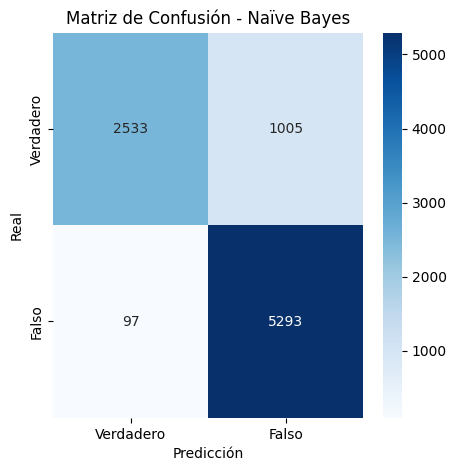

In [100]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_data = data['Titulo'].astype(str) + " " + data['Descripcion'].astype(str)
y_data = data['Label']  # Etiqueta: 1 (Falso), 0 (Verdadero)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

spanish_stopwords = stopwords.words('spanish')

vectorizer = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')
print(f'Precisión (Precision): {precision:.4f}')
print(f'Recuperación (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1 Score): {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Verdadero', 'Falso'], yticklabels=['Verdadero', 'Falso'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naïve Bayes')
plt.show()


4.2 Modelo 2: SVM -  Nicolas Perez Ramos


📈 Métricas de Evaluación SVM:
Precisión (Accuracy): 0.9159
Precisión (Precision): 0.8959
Sensibilidad (Recall): 0.9738
F1-Score: 0.9332

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3538
           1       0.90      0.97      0.93      5390

    accuracy                           0.92      8928
   macro avg       0.92      0.90      0.91      8928
weighted avg       0.92      0.92      0.91      8928



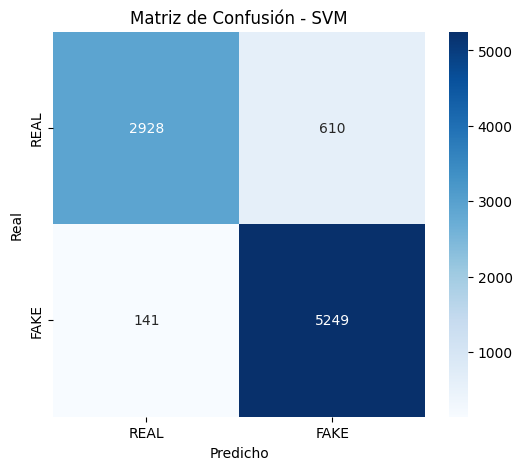

In [84]:

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)


print("\n📈 Métricas de Evaluación SVM:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

4.3 Modelo 3: - Anderson Arevalo Mendoza


📈 Métricas de Evaluación Random Forest Classifier:
Exactitud (Accuracy): 0.9409
Precisión (Precision): 0.9262
Sensibilidad (Recall): 0.9801
F1-Score: 0.9524

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3538
           1       0.93      0.98      0.95      5390

    accuracy                           0.94      8928
   macro avg       0.95      0.93      0.94      8928
weighted avg       0.94      0.94      0.94      8928



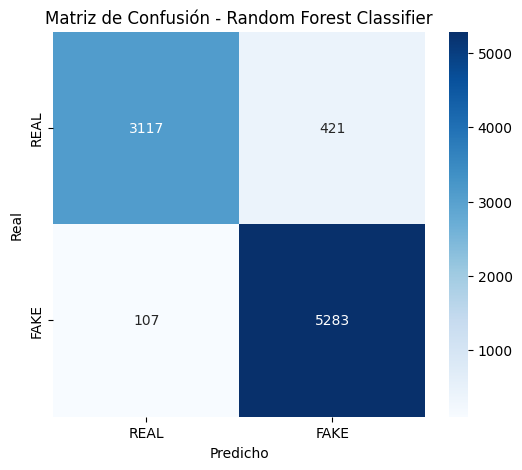

In [101]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_depth=2500, random_state=42)

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("\n📈 Métricas de Evaluación Random Forest Classifier:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Classifier')
plt.show()

# PREDICCION EN TEST

In [102]:
TestPath='/content/fake_news_spanish.csv'
test=pd.read_csv(TestPath, sep=';')

X_data = test['Titulo'].astype(str) + " " + test['Descripcion'].astype(str)
spanish_stopwords = stopwords.words('spanish')

vectorizer = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)
X_test_tfidf = vectorizer.fit_transform(X_data)

y_pred = clf.predict(X_test_tfidf)

In [103]:
print(y_pred.shape)

(57063,)


In [106]:
test['Label']=y_pred
test.to_csv("Prediccion_Test.csv", index=False)

In [104]:
print(test.shape)

(57063, 5)
